http://jmcauley.ucsd.edu/data/amazon/

http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/

https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt


* downloads the amazon reviews dataset
* create a balanced training set
* analyze the review length

In [0]:
import tensorflow as tf
import os
import json

import gzip
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

from google.colab import drive
drive.mount('/content/gdrive')
gitDir = "/content/gdrive/My Drive/nlp/"
os.chdir(gitDir + "data/")
print(os.listdir("."))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['Kaggle Amazon Fine Food.ipynb', 'cache', '__pycache__', 'old', '__init__.py', 'amazon_multilingual.py', 'organic_dataset.py', '.ipynb_checkpoints', 'confusion.py', 'load_dataset.py', 'Amazon Multilingual.ipynb', 'Organic Dataset.ipynb', 'Amazon Reviews.ipynb']


In [0]:
def extract(p):
  outDir = p[0:-3]
  with open(outDir, 'wb') as f_out, gzip.open(p, 'rb') as f_in:
          shutil.copyfileobj(f_in, f_out)

def getReviewData(filename, baseurl="https://s3.amazonaws.com/amazon-reviews-pds/tsv/"):
  p = "cache/" + filename
  outDir = p[0:-3]
  if os.path.exists(outDir) == True:
      print(outDir, "already exists. Skipping unzipping")
      return
    
  p = tf.keras.utils.get_file(filename,origin=baseurl + filename, extract=False, cache_dir=".", cache_subdir="cache")
  outDir = p[0:-3]
  extract(p)

In [0]:
basePath = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/"
files = [
    ("amazon_reviews_us_Video_DVD_v1_00.tsv.gz",   "Video DVD"),
    ("amazon_reviews_us_Music_v1_00.tsv.gz",       "Music"),
    ("amazon_reviews_us_Books_v1_00.tsv.gz",       "Books"),
    ("amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz", "Mobile_Apps"),
    ("amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz", "Digital_Video_Download"),
    ("amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz", "Digital_Music_Purchase"),
    ("amazon_reviews_us_Toys_v1_00.tsv.gz", "Toys"),
    ("amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz", "Digital_Ebook_Purchase"),
    ("amazon_reviews_us_PC_v1_00.tsv.gz", "PC"),
    ("amazon_reviews_us_Camera_v1_00.tsv.gz", "Camera"),
    ("amazon_reviews_us_Wireless_v1_00.tsv.gz", "Wireless"),
    ("amazon_reviews_us_Electronics_v1_00.tsv.gz", "Electronics"),
    ("amazon_reviews_us_Video_v1_00.tsv.gz", "Video"),
    ("amazon_reviews_us_Sports_v1_00.tsv.gz", "Sports"),
    ("amazon_reviews_us_Video_Games_v1_00.tsv.gz", "Video Games"),
    ("amazon_reviews_us_Watches_v1_00.tsv.gz", "Watches"),
    ("amazon_reviews_us_Shoes_v1_00.tsv.gz", "Shoes"),
    ("amazon_reviews_us_Home_v1_00.tsv.gz", "Home"),
    ("amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz", "Musical Instruments"),
    ("amazon_reviews_us_Baby_v1_00.tsv.gz", "Baby"),
    ("amazon_reviews_us_Home_Improvement_v1_00.tsv.gz", "Home Improvement"),
    ("amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz", "Home Entertainment"),
    ("amazon_reviews_us_Office_Products_v1_00.tsv.gz", "Office Products"),
    ("amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz", "Personal_Care_Appliances"),
    ("amazon_reviews_us_Automotive_v1_00.tsv.gz", "Automotive"),
    ("amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz", "Lawn and Garden"),
    ("amazon_reviews_us_Luggage_v1_00.tsv.gz", "Luggage"),
    ("amazon_reviews_us_Kitchen_v1_00.tsv.gz", "Kitchen"),
    ("amazon_reviews_us_Furniture_v1_00.tsv.gz", "Furniture"),
    ("amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz", "Health & Personal Care"),
    ("amazon_reviews_us_Software_v1_00.tsv.gz", "Software"),
    ("amazon_reviews_us_Grocery_v1_00.tsv.gz", "Grocery"),
    ("amazon_reviews_us_Pet_Products_v1_00.tsv.gz", "Pet Products"),
    ("amazon_reviews_us_Beauty_v1_00.tsv.gz", "Beauty")
]

for f in files:
  getReviewData(f[0], basePath)

cache/amazon_reviews_us_Video_DVD_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Music_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Books_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Mobile_Apps_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Digital_Video_Download_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Toys_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_PC_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Camera_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Wireless_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Electronics_v1_00.tsv already exists. Skipping unzipping
cache/amazon_reviews_us_Video_v1_

In [0]:
!ls -alh cache

total 56G
-rw------- 1 root root 563M May 13 16:19  amazon_reviews_multilingual_DE_v1_00.tsv
-rw------- 1 root root 231M May 13 16:18  amazon_reviews_multilingual_DE_v1_00.tsv.gz
-rw------- 1 root root 503M Jun 20 16:57  amazon_reviews_multilingual_DE_v1_00.tsv.shuffled
-rw------- 1 root root 470M Jun 20 20:50  amazon_reviews_multilingual_DE_v1_00.tsv.shuffled.filtered
-rw------- 1 root root 2.3K May 18 15:36  amazon_reviews_multilingual_TEST_v1_00.tsv
-rw------- 1 root root 1.4K May 14 19:28  amazon_reviews_multilingual_TEST_v1_00.tsv.gz
-rw------- 1 root root 2.3K Jun 14 09:27  amazon_reviews_multilingual_TEST_v1_00.tsv.shuffled.csv
-rw------- 1 root root 2.3K May 14 19:28  amazon_reviews_multilingual_TEST_v1_00.tsv.tsv
-rw------- 1 root root 1.3G Jun 20 17:14  amazon_reviews_us_Automotive_v1_00.tsv
-rw------- 1 root root 432M Jun 20 16:56  amazon_reviews_us_Baby_v1_00.tsv
-rw------- 1 root root 2.1G Jun 20 17:25  amazon_reviews_us_Beauty_v1_00.tsv
-rw------- 1 root root 6.3G Jun 20 

In [0]:
%%time
lines = []
for f in files:
  num_lines = sum(1 for line in open("cache/"+f[0][:-3], "rb"))
  print(f, ":\t", num_lines)
  lines.append( (num_lines, f[1]) )
  
print(np.sort(lines, 0))

('amazon_reviews_us_Video_DVD_v1_00.tsv.gz', 'Video DVD') :	 5069141
('amazon_reviews_us_Music_v1_00.tsv.gz', 'Music') :	 4751578
('amazon_reviews_us_Books_v1_00.tsv.gz', 'Books') :	 10319091
('amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz', 'Mobile_Apps') :	 5033377
('amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz', 'Digital_Video_Download') :	 4057148
('amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz', 'Digital_Music_Purchase') :	 1688885
('amazon_reviews_us_Toys_v1_00.tsv.gz', 'Toys') :	 4864250
('amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz', 'Digital_Ebook_Purchase') :	 5101694
('amazon_reviews_us_PC_v1_00.tsv.gz', 'PC') :	 6908555
('amazon_reviews_us_Camera_v1_00.tsv.gz', 'Camera') :	 1801975
('amazon_reviews_us_Wireless_v1_00.tsv.gz', 'Wireless') :	 9002022
('amazon_reviews_us_Electronics_v1_00.tsv.gz', 'Electronics') :	 3093870
('amazon_reviews_us_Video_v1_00.tsv.gz', 'Video') :	 380605
('amazon_reviews_us_Sports_v1_00.tsv.gz', 'Sports') :	 4850361
('amazon_r

# create balanced training set

In [0]:
frames = []
maxrows = 1000 * 10
for f in tqdm(files):
  x = pd.read_csv("cache/" + f[0][:-3], sep="\t", error_bad_lines=False, usecols=["review_headline", "review_body", "product_category"]) #, nrows=maxrows*10
  #x["product_category"] = [f[1]] * x.shape[0]
  x = x[ x.review_headline.notnull() & x.review_body.notnull() & x.product_category.notnull() ].sample(n=maxrows)
  frames.append(x)
  
frame = pd.concat(frames).sample(frac=1)
print(frame.shape)
frame.head()

(340000, 3)


,product_category,review_headline,review_body
3552135,Mobile_Apps,A fun new version of Wheel of Fortune,I look forward to the next game each time I go...
1746293,Electronics,Works as promised. Can hook up to any amp.,Might not know that just any turntable will wo...
1126573,Kitchen,I like the design as far as the color and shap...,I like the design as far as the color and shap...
28605,Personal_Care_Appliances,"YES, it works!","I give this contraption 5 stars because, once ..."
582126,Watches,Good looking,Nice looking watch. It is a christmas present ...


In [0]:
frame.product_category.value_counts()

Video Games                 10000
Pet Products                10000
Home Entertainment          10000
PC                          10000
Grocery                     10000
Toys                        10000
Books                       10000
Wireless                    10000
Kitchen                     10000
Software                    10000
Digital_Ebook_Purchase      10000
Watches                     10000
Electronics                 10000
Mobile_Apps                 10000
Digital_Music_Purchase      10000
Home Improvement            10000
Furniture                   10000
Music                       10000
Digital_Video_Download      10000
Video DVD                   10000
Shoes                       10000
Office Products             10000
Automotive                  10000
Musical Instruments         10000
Home                        10000
Luggage                     10000
Health & Personal Care      10000
Beauty                      10000
Camera                      10000
Sports        

In [0]:
frame.to_csv("cache/amazon_reviews_us_balanced.csv.shuffled", index=False)
!head cache/amazon_reviews_us_balanced.csv.shuffled
!ls -alh cache

product_category,review_headline,review_body
Mobile_Apps,A fun new version of Wheel of Fortune,I look forward to the next game each time I go to my Kindle. It is a little different than traditional Wheel of Fortune -- but vey fun just the same. Try it !
Electronics,Works as promised.  Can hook up to any amp.,Might not know that just any turntable will work on any amp.  Does the amp have a preamp? Is the turntable magnetic or ceramic?  With this turntable it doesn't matter.  Just flip the switch on the back and I hooked it up to a 70's vintage console stereo system with awesome sound from speakers set in a walnut cabinet.  The old turntables don't work in these old stereos but the amps and speakers . . . and radio nearly always do.  Plus it's pretty.
Kitchen,I like the design as far as the color and shape ...,"I like the design as far as the color and shape because it is pretty enough to put on the table for serving. However, it is too heavy to manage very easily.  I was looking for a d

### create validation set

In [0]:
f = pd.read_csv("cache/amazon_reviews_us_balanced.csv.shuffled")[300000:]
print(f.shape)
f.to_csv("cache/amazon_reviews_us_balanced_validation.csv.shuffled", index=False)

(40000, 3)


# create german shuffeled data w/o filtering non-german reviews

In [0]:
getReviewData("amazon_reviews_multilingual_DE_v1_00.tsv.gz", baseurl="https://s3.amazonaws.com/amazon-reviews-pds/tsv/")
de = pd.read_csv("cache/amazn_reviews_multilingual_DE_v1_00.tsv", sep="\t", usecols=["review_headline", "review_body", "product_category"]).sample(frac=1)
de.to_csv("cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled")
de.head()

In [0]:
%%time
!pip3 install --quiet langdetect
from tqdm import tqdm_notebook as tqdm
from langdetect import detect
de = pd.read_csv("cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled")
langs = []
for x in tqdm(de.review_body.values):
  try:
    language = detect(x)
    langs.append(language)
  except:
    print("This row throws and error:", x)
    langs.append("unknown")

This row throws and error: 2008-12-14
This row throws and error: 2011-02-11
This row throws and error: 2008-07-24
This row throws and error: 2011-07-29
This row throws and error: 11 1 1 1 1 1 1 1 . .. .  ..... . .... . .. .. .. . .... . . . . . . ...
This row throws and error: 2007-03-07
This row throws and error: 2007-08-03
This row throws and error: 2010-12-26
This row throws and error: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
This row throws and error: 2014-05-01
This row throws and error: 2014-01-12
This row throws and error: 2012-11-04
This row throws and error: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
This row throws and error: 2014-04-06
This row throws and error: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
This row throws and error: 2013-11-21
This row throws and error: 2012-08-07
This row throws and error: 2010-03-10
This row throws and error: 2012-09-14
This row throws and error: .............. ...................... ................... ............

In [0]:
de["lang"] = langs
filtered = de[ de.lang == "de"]
print(de.shape)
print(filtered.shape)
filtered.head()

(678993, 5)
(628361, 5)


,Unnamed: 0,product_category,review_headline,review_body,lang
0,391998,Music,"Miserabler Sound wie von Kassette,einfach nur ...",Nach so langer Zeit ist das Album doch eher en...,de
1,610323,Digital_Video_Download,Einfach großartig!,Wer Oldies nochmal in Action mag - so wie Spac...,de
2,574928,Music,Von Pop bis Rock ist alles dabei,Avril Lavigne ist eine wunderbare Mischung aus...,de
3,174778,Digital_Music_Purchase,Einfach wundervoll,Babra Streisand forever. Sie hat von mir immer...,de
4,79938,Digital_Video_Download,Nicht schlecht aber zu kurz am Ende,Sehr cooler Aktion/ Scifi Film aber das am End...,de


In [0]:
filtered.to_csv("cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled.filtered")

In [0]:
unique, counts = np.unique(langs, return_counts=True)
print (np.asarray((unique, counts)).T)

[['af' '110']
 ['ar' '1']
 ['bg' '2']
 ['ca' '145']
 ['cs' '4']
 ['cy' '108']
 ['da' '106']
 ['de' '628361']
 ['en' '48652']
 ['es' '175']
 ['et' '33']
 ['fa' '1']
 ['fi' '13']
 ['fr' '311']
 ['hr' '26']
 ['hu' '20']
 ['id' '21']
 ['it' '156']
 ['ko' '2']
 ['lt' '5']
 ['lv' '2']
 ['nl' '172']
 ['no' '73']
 ['pl' '19']
 ['pt' '53']
 ['ro' '9']
 ['ru' '16']
 ['sk' '22']
 ['sl' '15']
 ['so' '88']
 ['sq' '36']
 ['sv' '93']
 ['tl' '14']
 ['tr' '2']
 ['unknown' '117']
 ['vi' '9']
 ['zh-cn' '1']]


# analyze text length

In [0]:
rows = 1000 * 340
us = pd.read_csv("cache/amazon_reviews_us_balanced.csv.shuffled", nrows=rows)
de = pd.read_csv("cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled", nrows=rows)
print(us.shape, de.shape)

(340000, 3) (340000, 4)


In [0]:
us_lenghts = [len(s) for s in us.review_body.values]
de_lenghts = [len(s) for s in de.review_body.values]

In [0]:
print("US median:", np.median(us_lenghts))
print("DE median", np.median(de_lenghts))

print("US mean:", np.mean(us_lenghts))
print("DE mean", np.mean(de_lenghts))

US median: 169.0
DE median 338.0
US mean: 345.9432147058823
DE mean 723.5629470588235


In [0]:
os.chdir(gitDir)

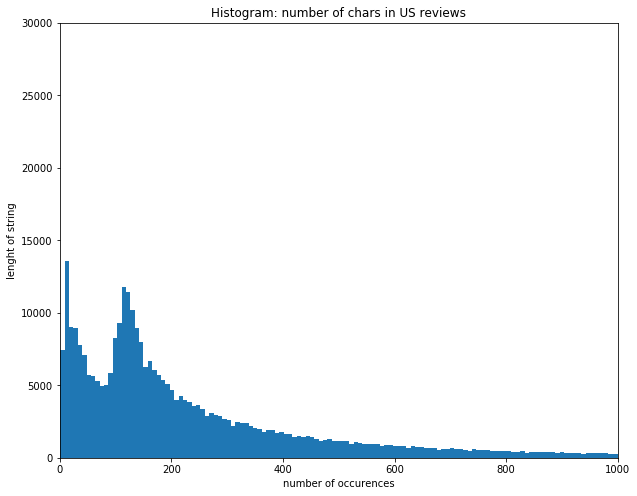

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(us_lenghts, bins='auto')
plt.title("Histogram: number of chars in US reviews")
plt.xlim(0,1000)
plt.ylabel("lenght of string")
plt.xlabel("number of occurences")
plt.ylim(0,30000)
plt.savefig("imgs/histogram_us.png")
plt.show()

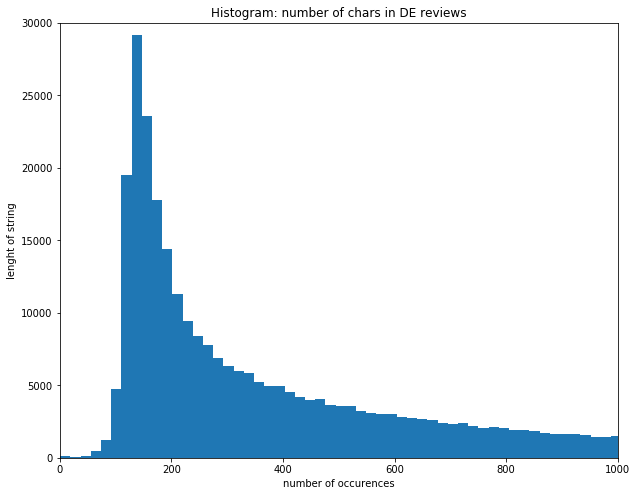

In [0]:
plt.figure(figsize=(10,8))
plt.hist(de_lenghts, bins='auto')
plt.title("Histogram: number of chars in DE reviews")
plt.xlim(0,1000)
plt.ylabel("lenght of string")
plt.xlabel("number of occurences")
plt.ylim(0,30000)
plt.savefig("imgs/histogram_de.png")
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f615cc5aa58>],
 'caps': [<matplotlib.lines.Line2D at 0x7f615cc5a9e8>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6162b641d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f615cc5a4a8>,
  <matplotlib.lines.Line2D at 0x7f615cc5aac8>]}

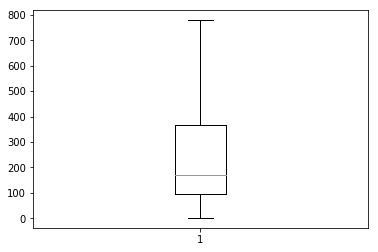

In [0]:
plt.boxplot(us_lenghts, showfliers=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f615bdf5b70>],
 'caps': [<matplotlib.lines.Line2D at 0x7f615c5eecc0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f615ce43390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f615bdf5710>,
  <matplotlib.lines.Line2D at 0x7f615bdf5668>]}

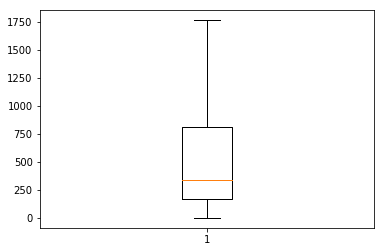

In [0]:
plt.boxplot(de_lenghts, showfliers=False)

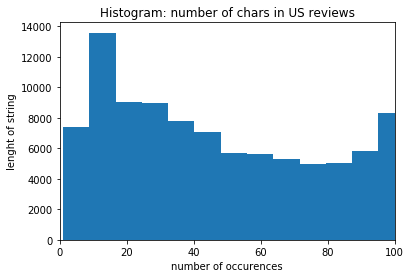

In [0]:
import matplotlib.pyplot as plt
plt.hist(us_lenghts, bins='auto')
plt.title("Histogram: number of chars in US reviews")
plt.xlim(0,100)
plt.ylabel("lenght of string")
plt.xlabel("number of occurences")
plt.show()

In [0]:
!ls
!ls imgs

'Amazon Multilingual.ipynb'   __init__.py
 amazon_multilingual.py      'Kaggle Amazon Fine Food.ipynb'
'Amazon Reviews.ipynb'	      load_dataset.py
 cache			      old
 confusion.py		     'Organic Dataset.ipynb'
 histogram_de.png	      organic_dataset.py
 histogram_us.png	      __pycache__
ls: cannot access 'imgs': No such file or directory


# remove short reviews

In [0]:
us = pd.read_csv("cache/amazon_reviews_us_balanced.csv.shuffled")
de = pd.read_csv("cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled")

In [0]:
print(de.shape)
de = de.loc[de['review_body'].str.len() > 20]
print(de.shape)

(678993, 4)
(678773, 4)


In [0]:
print(us.shape)
us = us.loc[us['review_body'].str.len() > 20]
print(us.shape)

(340000, 3)
(314146, 3)


In [0]:
us.to_csv("cache/amazon_reviews_us_balanced.csv.shuffled.shortfilter")